#**Binary threshold**

In [ ]:
!pip install rasterio

In [44]:
import os
import rasterio
import numpy as np
from rasterio import plot
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

base_path = '/content/drive/MyDrive/GEE_exports'
os.chdir(base_path)

In [8]:
dataset = rasterio.open('reprojected2.tif')

In [9]:
rgb = dataset.read([1, 2, 3])
rgb = rgb.transpose(1, 2, 0) #rgb

In [11]:
gray = (dataset.read(1)+dataset.read(2)+dataset.read(3))/3

In [12]:
#Histogram stretch
p2, p98 = np.percentile(gray, (2, 98))
gray_stretched = np.clip((gray - p2) / (p98 - p2), 0, 1)

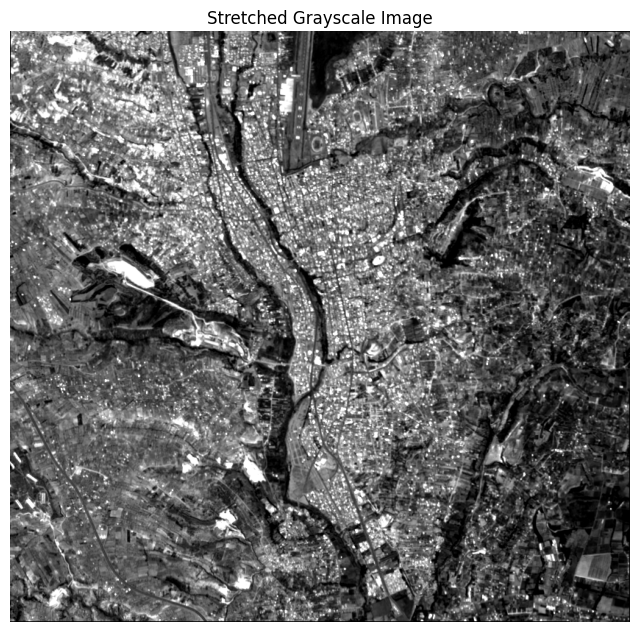

In [15]:
#Plot grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(gray_stretched, cmap='gray')
plt.title("Stretched Grayscale Image")
plt.axis('off')
plt.show()

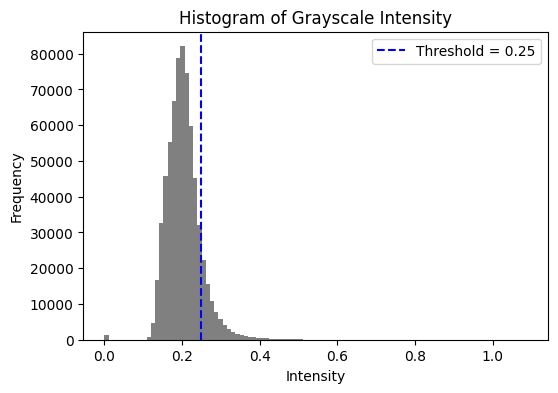

In [21]:
# 4. Histogram
threshold = 0.25
plt.figure(figsize=(6, 4))
plt.hist(gray.ravel(), bins=100, color='gray')
plt.title("Histogram of Grayscale Intensity")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.axvline(threshold, color='blue', linestyle='dashed', label=f'Threshold = {threshold}')
plt.legend()
plt.show()

In [25]:
binary = np.where(gray < threshold, 1, 0)

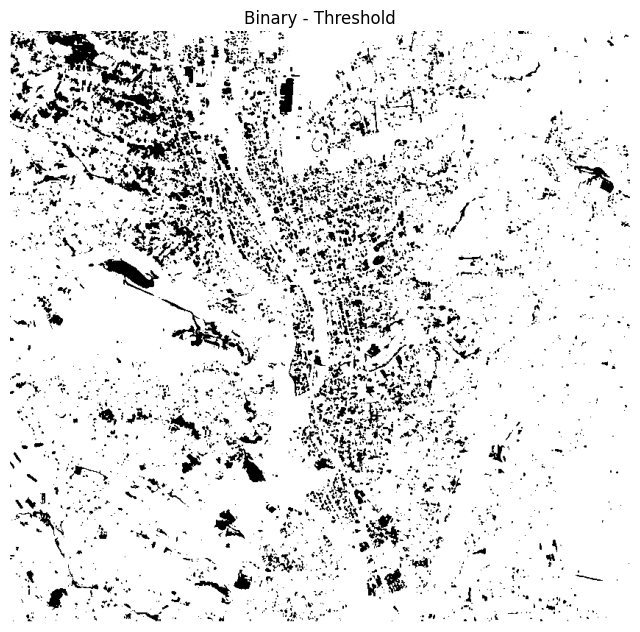

In [29]:
plt.figure(figsize=(8, 8))
plt.imshow(binary, cmap='gray')
plt.title("Binary - Threshold")
plt.axis('off')
plt.show()

#**Low-pass filter or Boxcar filter**

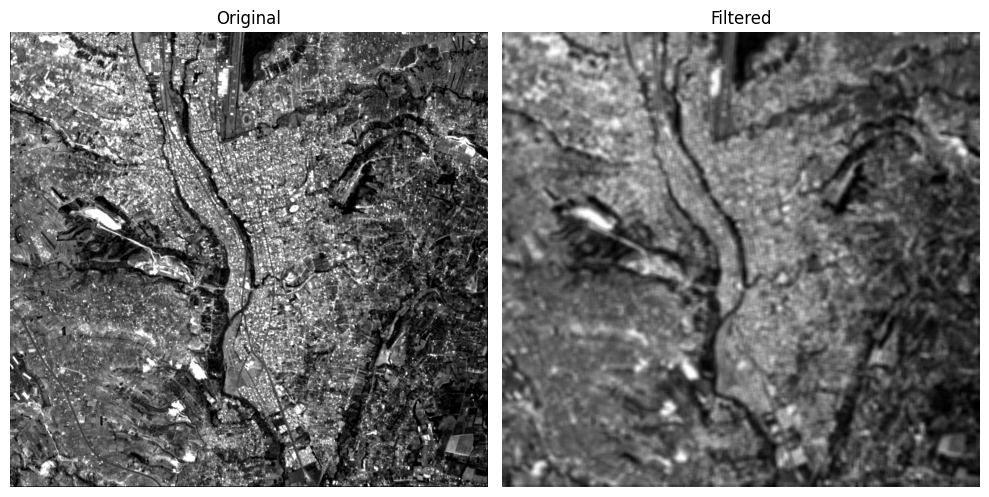

In [42]:
# Example grayscale image `gray` as 2D array
kernel_size = 9
kernel = np.ones((kernel_size, kernel_size)) / kernel_size # same as R's W

filtered = convolve(gray_stretched, kernel)

# Plot original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_stretched, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered, cmap='gray')
plt.title("Filtered")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Visualize the kernel
plt.imshow(kernel, cmap='viridis')
plt.colorbar()
plt.title(f'Gaussian Kernel ({kernel_size}x{kernel_size}, σ={sigma})')
plt.show()

In [45]:
print(kernel)

[[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]]


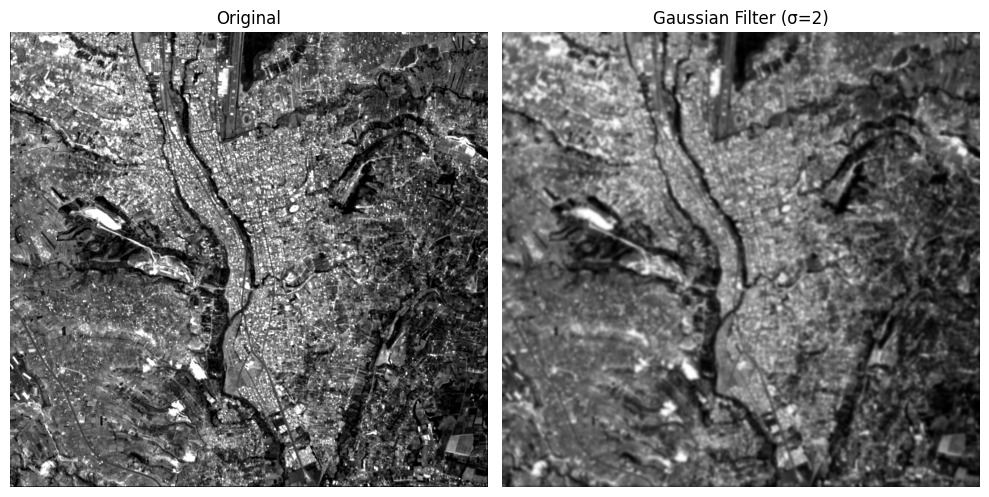

In [46]:
sigma = 2  # Adjustable

filtered = gaussian_filter(gray_stretched, sigma=sigma)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_stretched, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered, cmap='gray')
plt.title(f"Gaussian Filter (σ={sigma})")
plt.axis('off')

plt.tight_layout()
plt.show()

#**Gaussian filter**

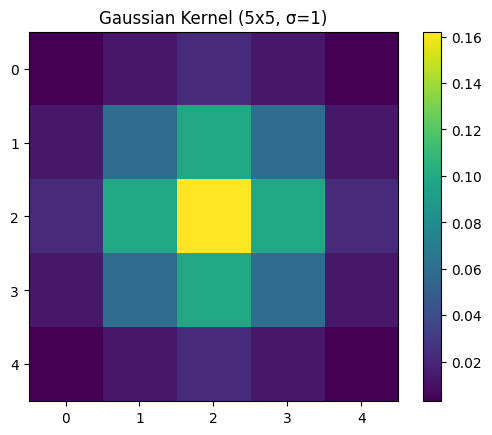

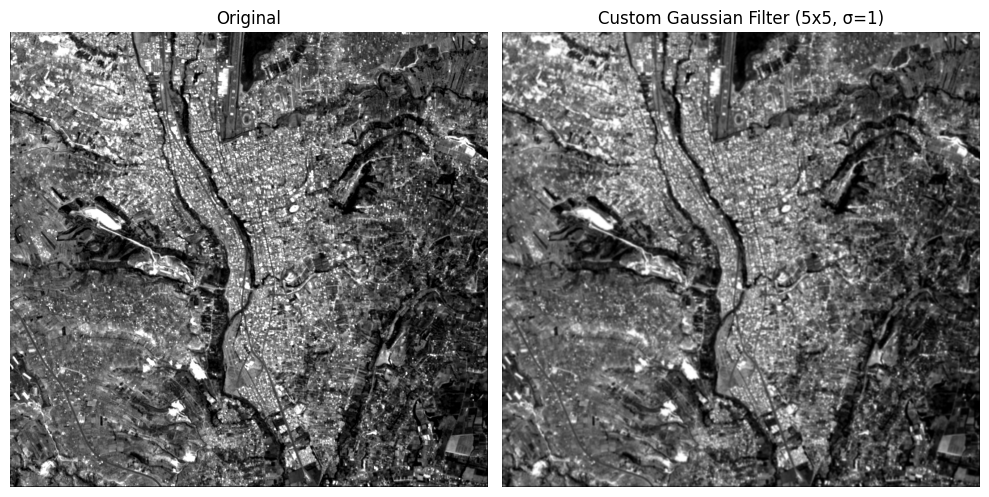

In [54]:
def gaussian_kernel(kernel_size=5, sigma=1):
    """Create a 2D Gaussian kernel."""
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

# Parameters
kernel_size = 5
sigma = 1

# Generate the kernel
kernel = gaussian_kernel(kernel_size, sigma)

# Visualize the kernel
plt.imshow(kernel, cmap='viridis')
plt.colorbar()
plt.title(f'Gaussian Kernel ({kernel_size}x{kernel_size}, σ={sigma})')
plt.show()

# Optional: Apply it to an image
filtered_custom = convolve(gray_stretched, kernel, mode='constant', cval=0.0)

# Compare results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_stretched, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_custom, cmap='gray')
plt.title(f"Custom Gaussian Filter ({kernel_size}x{kernel_size}, σ={sigma})")
plt.axis('off')

plt.tight_layout()
plt.show()

In [51]:
kernel

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])